$$\textrm{Joaquin Peñuela Parra}$$
$$\textrm{University of Los Andes}$$
$$\textrm{High Energy Physics Group: Phenomenology of Particles}$$

This code was written to be running in Docker. If you do not have a Docker inside hep-server2 please refer to: https://github.com/Phenomenology-group-uniandes/Tutoriales_Generales

In [1]:
import os, sys
sys.path.append(os.path.join(os.getcwd().split("Leptoquarks_Searches_2023")[0]))

from Uniandes_Framework.delphes_reader import DelphesLoader 
from Uniandes_Framework.delphes_reader import root_analysis 
from Uniandes_Framework.delphes_reader import Quiet 

from ROOT import TH1F 
from ROOT import TCanvas 
from ROOT import THStack 
from ROOT import TLegend 
from ROOT import TLatex 
from ROOT import TPad

import pandas as pd
import numpy as np

Welcome to JupyROOT 6.22/06


In [2]:
channels = ['hadronic_non-resonant','hadronic_sLQ','hadronic_dLQ','semileptonic_non-resonant','semileptonic_sLQ','semileptonic_dLQ']

signals = ['LQ_LQ', 'Tau_LQ', 'Tau_Tau']
Masses = [#'1250', 
          '1500', 
          #'1750', '2000', '2250', '2500'
]
suffix_by_betard = {'wRHC': '', 'woRHC': '_wo_RHC'}

In [3]:
csv_folder = '/disco4/pheno_csv_files/Leptoquarks_Searches/'
bkgs = ['ttbar', 'stop']

In [4]:
#Testing
csv_folder = '/disco4/pheno_csv_files/Leptoquarks_Searches/'
bkgs = ['ttbar', 'stop','z_jets', 'w_jets', 'ww', 'wz', 'zz']

In [5]:
Datasets_signal = {} 

for key in suffix_by_betard:
    Datasets_signal[key] = {}
    for channel in channels:
        Datasets_signal[key][channel] = {}
        for M in Masses:
            Datasets_signal[key][channel][M] = {}
            for signal in signals:
                Datasets_signal[key][channel][M][signal] = {}
                path_csv = os.path.join(csv_folder, f'{signal}{suffix_by_betard[key]}_{M}', f'{signal}{suffix_by_betard[key]}_{M}_{channel}.csv')
                try: 
                    Datasets_signal[key][channel][M][signal] = pd.read_csv(path_csv)
                    Datasets_signal[key][channel][M][signal]["sT(GeV)"] = Datasets_signal[key][channel][M][signal]["sT(GeV)"]/1000 #Scaling Xaxis to TeV
                    Datasets_signal[key][channel][M][signal]["Mass_{lep_{1}#tau_{1}}(GeV)"] = Datasets_signal[key][channel][M][signal]["Mass_{lep_{1}#tau_{1}}(GeV)"]/1000 #Scaling Xaxis to TeV
                    Datasets_signal[key][channel][M][signal]['#Delta #vec{pT}_{lep_{1}#tau_{1}}(GeV)'] = Datasets_signal[key][channel][M][signal]['#Delta #vec{pT}_{lep_{1}#tau_{1}}(GeV)']/1000 #Scaling Xaxis to TeV
                except: pass
    
Datasets_bkg = {} 

for channel in channels:
    Datasets_bkg[channel] = {}
    for bkg in bkgs:
        Datasets_bkg[channel][bkg] = {}
        path_csv = os.path.join(csv_folder, f'{bkg}', f'{bkg}_{channel}.csv')
        try: 
            Datasets_bkg[channel][bkg] = pd.read_csv(path_csv)
            Datasets_bkg[channel][bkg]["sT(GeV)"] = Datasets_bkg[channel][bkg]["sT(GeV)"]/1000 #Scaling Xaxis to TeV
            Datasets_bkg[channel][bkg]["Mass_{lep_{1}#tau_{1}}(GeV)"] = Datasets_bkg[channel][bkg]["Mass_{lep_{1}#tau_{1}}(GeV)"]/1000 #Scaling Xaxis to TeV
            Datasets_bkg[channel][bkg]['#Delta #vec{pT}_{lep_{1}#tau_{1}}(GeV)'] = Datasets_bkg[channel][bkg]['#Delta #vec{pT}_{lep_{1}#tau_{1}}(GeV)']/1000 #Scaling Xaxis to TeV
        except: pass

In [6]:
Datasets_bkg['semileptonic_sLQ']['ttbar'].head()

,pT_{lep_{1}}(GeV),#eta_{lep_{1}},#phi_{lep_{1}},Energy_{lep_{1}}(GeV),#Delta R_{lep_{1}#tau_{1}},#Delta #eta_{lep_{1}#tau_{1}},#Delta #phi_{lep_{1}#tau_{1}},#Delta pT_{lep_{1}#tau_{1}}(GeV),#Delta #vec{pT}_{lep_{1}#tau_{1}}(GeV),#Delta #vec{p}_{lep_{1}#tau_{1}}(GeV),...,#Delta pT_{b_{1}MET}(GeV),#Delta #vec{pT}_{b_{1}MET}(GeV),pT_{MET}(GeV),#phi_{MET},sT(GeV),hT(GeV),mT(GeV),light_jets_multiplicity,Mass_{lep_{1}#tau_{1}}(GeV),Q_{lep_{1}}Q_{#tau_{1}}
0,37.108791,-0.249878,-1.515376,38.273495,3.162321,1.983031,-2.463303,-85.261234,0.153046,575.465409,...,74.705750,207.731168,66.570740,3.121131,0.367326,523.520866,1355.503960,4.0,0.202741,1.0
1,135.373428,1.033134,0.563198,214.279097,2.754609,0.453503,-2.717022,-161.864090,0.424273,424.574069,...,122.837681,173.190219,33.687496,-2.016295,0.622824,0.000000,2473.255987,0.0,0.409100,-1.0
2,70.375885,-1.823944,0.229734,223.712084,2.292515,-1.640471,1.601399,1.794685,0.099757,223.230615,...,-66.978325,256.485283,162.803711,1.198140,0.397586,121.984436,1448.141958,2.0,0.163164,-1.0
3,51.340553,1.882393,2.181658,172.541119,2.976042,0.852115,-2.851442,-26.502312,0.127884,145.580171,...,-9.787178,22.005128,73.475197,-2.998616,0.266347,0.000000,1330.557158,0.0,0.137303,-1.0
4,81.296844,0.654013,-2.120166,99.312199,1.273588,-0.711987,1.055983,-33.465401,0.102918,184.586815,...,49.948166,127.250316,47.077644,2.828583,0.340163,303.419323,789.986637,3.0,0.120186,-1.0


In [7]:
Datasets_signal['wRHC']['semileptonic_sLQ']['1500']['LQ_LQ']

,pT_{lep_{1}}(GeV),#eta_{lep_{1}},#phi_{lep_{1}},Energy_{lep_{1}}(GeV),#Delta R_{lep_{1}#tau_{1}},#Delta #eta_{lep_{1}#tau_{1}},#Delta #phi_{lep_{1}#tau_{1}},#Delta pT_{lep_{1}#tau_{1}}(GeV),#Delta #vec{pT}_{lep_{1}#tau_{1}}(GeV),#Delta #vec{p}_{lep_{1}#tau_{1}}(GeV),...,#Delta pT_{b_{1}MET}(GeV),#Delta #vec{pT}_{b_{1}MET}(GeV),pT_{MET}(GeV),#phi_{MET},sT(GeV),hT(GeV),mT(GeV),light_jets_multiplicity,Mass_{lep_{1}#tau_{1}}(GeV),Q_{lep_{1}}Q_{#tau_{1}}
0,542.156860,-0.505808,-1.987099,613.001441,2.551887,0.059530,-2.551193,229.569122,0.820495,826.540441,...,-18.037598,1083.544424,553.311035,-0.589927,1.943329,334.849152,2364.895484,1.0,0.788181,-1.0
1,217.504913,-1.462627,-0.226533,494.705462,2.592858,-1.570750,-2.062925,-85.739502,0.448994,655.204784,...,216.372437,1285.317651,569.864014,0.412693,1.876850,414.522581,2743.304702,4.0,0.627526,-1.0
2,305.501465,-0.377499,-2.796371,327.528998,2.263001,-2.228707,-0.392476,156.977203,0.177601,605.900816,...,357.679993,1719.647253,681.283630,-2.568214,2.174273,103.826084,4212.352125,2.0,0.585252,-1.0
3,114.791183,-1.465911,-0.283980,261.859100,2.004679,-1.528190,-1.297448,-135.311737,0.245413,350.999380,...,712.246063,928.132872,352.961090,-0.291666,1.783062,1304.699692,3574.344136,2.0,0.350888,-1.0
4,332.603668,-0.774218,0.509951,437.367256,3.230178,-2.535019,2.001932,88.994232,0.487537,1087.082706,...,184.123108,1223.517174,531.312012,1.209742,1.822960,579.250473,2516.219977,2.0,1.047169,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22929,126.655090,1.989143,-2.617449,471.542115,1.679188,1.647919,0.322542,-767.436340,0.775008,788.122024,...,-352.462341,789.342765,767.632446,-0.403749,2.203549,979.791924,2873.274818,6.0,0.629040,-1.0
22930,188.459290,0.671250,1.079693,232.535240,3.228246,2.081688,-2.467417,52.168411,0.306959,503.280625,...,70.936569,304.623079,164.419495,2.142146,0.724526,387.498299,2535.602297,3.0,0.499459,-1.0
22931,170.474609,1.164644,-1.797327,299.763964,3.083846,2.395151,-1.942513,-95.660034,0.364482,756.739167,...,646.833557,1102.206780,232.960449,-1.014728,1.549364,492.638592,1922.609924,2.0,0.731346,-1.0
22932,224.379837,0.278971,-2.025444,233.167809,1.935535,1.823241,-0.649684,-96.865585,0.196856,805.977774,...,-187.984314,1275.594427,737.181946,-1.590893,1.832005,1083.850021,2559.190477,2.0,0.585983,-1.0


In [8]:
bins_dict={
    "#Delta R":[50,0.5,5],
    # "#Delta #eta":[80,-5,5],
    # "#Delta #phi":[52,-3.25,3.25],
    # "#Delta pT":[120, 0.0, 1500.0],
    "#Delta #vec{pT}":[50, 0.0, 2.5],
    # "#Delta #vec{p}":[240, 0.0, 4800.0],
    # "MET(GeV)":[80, 0.0, 1000.0],
    # "pT_": [160, 0.0, 2000.0],
    "Mass_{lep_{1}#tau_{1}}(GeV)": [50, 0.0, 3.000], 
    "sT(GeV)": [50, 0.0, 5.000],
    # "mT(GeV)": [200, 0.0, 4000.0],
    # "#eta_":[80, -5, 5],
    # "#phi_":[128, -3.2, 3.2],
    # "Energy_":[80, 0.0, 1000.0]
}

In [9]:
Histograms_signal = {} 

for key in suffix_by_betard:
    Histograms_signal[key] = {}
    for channel in channels:
        Histograms_signal[key][channel] = {}
        for M in Masses:
            Histograms_signal[key][channel][M] = {}
            for signal in signals:                
                Data = Datasets_signal[key][channel][M][signal]
                Histograms_signal[key][channel][M][signal] = root_analysis.make_histograms(Data, hist_bins_dict = bins_dict)
    
Histograms_bkg = {} 

for channel in channels:
    Histograms_bkg[channel] = {}
    for bkg in bkgs:                
        Data = Datasets_bkg[channel][bkg]
        Histograms_bkg[channel][bkg] = root_analysis.make_histograms(Data, hist_bins_dict = bins_dict)

In [10]:
#Histograms_bkg['hadronic_sLQ']['ttbar']

In [11]:
Histograms_signal['wRHC']['semileptonic_sLQ']['1500']['LQ_LQ'].keys()

dict_keys(['#Delta R_{lep_{1}#tau_{1}}', '#Delta #vec{pT}_{lep_{1}#tau_{1}}(GeV)', '#Delta R_{lep_{1}b_{1}}', '#Delta #vec{pT}_{lep_{1}b_{1}}(GeV)', '#Delta #vec{pT}_{lep_{1}MET}(GeV)', '#Delta R_{#tau_{1}b_{1}}', '#Delta #vec{pT}_{#tau_{1}b_{1}}(GeV)', '#Delta #vec{pT}_{#tau_{1}MET}(GeV)', '#Delta #vec{pT}_{b_{1}MET}(GeV)', 'sT(GeV)', 'Mass_{lep_{1}#tau_{1}}(GeV)'])

In [12]:
def Read_Cutflows_N_Events(channel, signal, Luminosity = 137*1000):
    
    #[Luminosity]: 1/pb
    cutflows_path = os.path.join('Cutflows', f'{channel}.csv')
    cutflows_file = pd.read_csv(cutflows_path, index_col= 0)
    cutflows_file = cutflows_file.dropna()
    
    Efficience = cutflows_file[signal]['DeltaR > 0.3']/cutflows_file[signal]['All']
    XS = cutflows_file[signal]['XS']
    return Efficience*XS*Luminosity

In [13]:
with Quiet():

    for key in suffix_by_betard:
        for channel in channels:
            for M in Masses:
                for signal in signals:                
                    for histo_key in Histograms_signal[key][channel][M][signal]:
                        
                        histo = Histograms_signal[key][channel][M][signal][histo_key]
                        N_events = Read_Cutflows_N_Events(channel, f'{signal}{suffix_by_betard[key]}_{M}')
                        try: histo.Scale(N_events/histo.Integral())
                        except: pass
        
    for channel in channels:
        for bkg in bkgs: 
            
            N_events = Read_Cutflows_N_Events(channel, bkg)
            
            for histo_key in Histograms_bkg[channel][bkg]:
    
                histo = Histograms_bkg[channel][bkg][histo_key]
                try: histo.Scale(N_events/histo.Integral())
                except: pass

/tmp/ipykernel_26529/2941602189.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  try: histo.Scale(N_events/histo.Integral())
/tmp/ipykernel_26529/2941602189.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  try: histo.Scale(N_events/histo.Integral())
/tmp/ipykernel_26529/2941602189.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  try: histo.Scale(N_events/histo.Integral())
/tmp/ipykernel_26529/2941602189.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  try: histo.Scale(N_events/histo.Integral())
/tmp/ipykernel_26529/2941602189.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  try: histo.Scale(N_events/histo.Integral())
/tmp/ipykernel_26529/2941602189.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  try: histo.Scale(N_events/histo.Integral())
/tmp/ipykernel_26529/2941602189.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  try: histo.Scale(N_events/his

In [14]:
for channel in channels:
    Histograms_bkg[channel]['w_jets'] = {}
    N_events = Read_Cutflows_N_Events(channel, 'w_jets')
    
    for histo_key in Histograms_bkg[channel]['z_jets']:
                
        h_w_jets = Histograms_bkg[channel]['z_jets'][histo_key].Clone('')
        h_w_jets.SetDirectory(0)
        h_w_jets.SetNameTitle('w_jets', 'w_jets')
        try: h_w_jets.Scale(N_events/h_w_jets.Integral())
        except: pass
    
        Histograms_bkg[channel]['w_jets'][histo_key] = h_w_jets

First Version:

In [15]:
suffix_by_betard = {'wRHC': '', 'woRHC': '_wo_RHC'}
header_by_betard = {'wRHC': '#beta_{R} = -1', 'woRHC': '#beta_{R} = 0'}

def Overlap_Histos(Signal_Histogram_Dict, 
                   Bkg_Histogram_Dict, 
                   channel,
                   Signal_Directory, 
                   Bkg_Directory, 
                   Title_Plot,
                   Kinematic_variable,
                   Mass, 
                   betard_key = 'wRHC',
                   Signal_to_ignore = '', 
                   alpha_bkg = 0.05, 
                   alpha_signal = 0.05, 
                   Stack = False, 
                   Log_Y = False, 
                   Log_X = True, 
                   Grid = False,
                   Path_folder_to_save = ''):
    
    #if Stack is False -> Histograms will be normalized by A.U
    #if Stack is True -> Histograms will be normalized by number of physical events

    #canvas = TCanvas(Title_Plot, " ", 0, 0, 1280, 720)
    canvas = TCanvas(Title_Plot, " ", 0, 0, 800, 600)
    
    
    #legend = TLegend(0.9,.4,1,.89) #Legend outside the graph
    legend = TLegend(0.48,.75,0.87,.89)
    legend.SetTextFont(132)
    legend.SetNColumns(4) 
    legend.SetHeader('M_{U}' + f'= {int(Mass)/1000} TeV' + ', g_{U} = 1.8' + ', ' + header_by_betard[betard_key],"C")
                       
    legend.SetLineWidth(1)
    #legend.SetFillStyle(0) #Transparent legend window
    
    x_axis = Kinematic_variable.replace('(GeV)', '[GeV]')
    
    Histos = THStack('hist', Title_Plot)
    colors = [94,6,3,209,1,2,226,4] #https://root-forum.cern.ch/t/what-is-your-best-way-to-increment-colors/13809
    
    Dict_Hist = {}
        
    for i in range(len(Bkg_Directory.keys())):
            bkg_key = list(Bkg_Directory.keys())[i]
            bkg_list = Bkg_Directory[bkg_key]
            
            histo_list = []
            for bkg in bkg_list:
                if (bkg != Signal_to_ignore):
                    if (Bkg_Histogram_Dict[channel][bkg][Kinematic_variable] != {}):
                        h = Bkg_Histogram_Dict[channel][bkg][Kinematic_variable]
                        h.Scale(Read_Cutflows_N_Events(channel, bkg)/h.Integral())
                        histo_list.append(h)
                
            histo_Nevents = root_analysis.sum_histos(histo_list)
            histo_normalized = root_analysis.sum_histos(histo_list)
            histo_normalized.Scale(1.0/histo_normalized.Integral())
            
            if (Stack): 
                histo = histo_Nevents
                histo.SetTitle(f'{bkg_key}; {x_axis}; Events')
            else: 
                histo = histo_normalized
                histo.SetTitle(f'{bkg_key}; {x_axis}; A.U')
            
            color = len(Signal_Directory.keys()) + i + 1
            if color == 7: color = 3
            
            color = colors[i]
            
            histo.SetLineColor(color)
            histo.SetFillColorAlpha(color, alpha_bkg)
            histo.SetLineWidth(2)
            histo.SetDirectory(0)  
            histo.Rebin(2)
            
            Histos.Add(histo)
            Dict_Hist[bkg_key] = histo
            legend.AddEntry(histo,bkg_key)
    
    Signal_Histogram_Dict = Signal_Histogram_Dict[betard_key]
    for j in range(len(Signal_Directory.keys())):
            signal_key = list(Signal_Directory.keys())[j]
            signal_list = Signal_Directory[signal_key]
            
            histo_list = []
            for signal in signal_list:
                if (signal != Signal_to_ignore):
                    if (Signal_Histogram_Dict[channel][Mass][signal][Kinematic_variable] != {}):
                        h = Signal_Histogram_Dict[channel][Mass][signal][Kinematic_variable]
                        h.Scale(Read_Cutflows_N_Events(channel, f'{signal}{suffix_by_betard[betard_key]}_{Mass}')/h.Integral())
                        histo_list.append(h)
                
            histo_Nevents = root_analysis.sum_histos(histo_list)
            
            histo_normalized = root_analysis.sum_histos(histo_list)
            histo_normalized.Scale(1.0/histo_normalized.Integral())
            
            if (Stack): 
                histo = histo_Nevents
                histo.SetTitle(f'{signal_key}; {x_axis}; Events')
            else: 
                histo = histo_normalized
                histo.SetTitle(f'{signal_key}; {x_axis}; A.U')
            
            color = j + 1
            if color == 3: color = 7
            
            color = colors[i + j + 1]
            
            histo.SetLineColor(color)
            histo.SetFillColorAlpha(color, alpha_signal)
            histo.SetLineStyle(2)
            histo.SetLineWidth(2)
            histo.SetDirectory(0) 
            histo.Rebin(2)
            
            Histos.Add(histo)
            Dict_Hist[signal_key] = histo
            legend.AddEntry(histo,signal_key)
            
    if Log_Y: canvas.SetLogy()
    if Log_X: canvas.SetLogx()
    if Grid: canvas.SetGrid()   
                       
    if Stack:
        Histos.Draw("hist")
        Histos.SetTitle(f'; {x_axis}; Events')  
        
    else: 
        Histos.Draw("histnostack")
        Histos.SetTitle(f'; {x_axis}; A.U')  
    
    latex = TLatex()
    latex.SetNDC()
    latex.SetTextSize(0.04)
    latex.SetTextFont(22) #https://root.cern.ch/doc/master/classTAttText.html
    latex.DrawLatex(0.76,0.92,'#sqrt{s} = 13 TeV')
    latex.DrawLatex(0.1,0.92,Title_Plot)

    Histos.GetXaxis().SetTitleFont(132)
    Histos.GetXaxis().SetLabelFont(132)
    Histos.GetYaxis().SetTitleFont(132)
    Histos.GetYaxis().SetLabelFont(132)                       
                       
    #latex.DrawLatex(0.61,0.91,'#sqrt{s} = 13 TeV, L = 137 fb^{-1}')
    canvas.Draw()
    legend.Draw('same')
    
    #Histos.GetXaxis().SetLimits(0.0, float(Mass)*3)          
    
    if Path_folder_to_save != '':
        try: os.mkdir(Path_folder_to_save)
        except: pass

        with root_analysis.Quiet():
            root_analysis.Save_Histograms_png(Path_folder_to_save, Dict_Hist, Log_Y = True)
            root_analysis.Write_txt_file_with_high_per_bin(os.path.join(Path_folder_to_save, 'high_per_bin'), Dict_Hist)
            canvas.SaveAs(os.path.join(Path_folder_to_save, f'THStack_{channel}.png')) 
            
    Dict_Hist['THStack'] = Histos     
    
    return Histos, canvas, legend, Dict_Hist

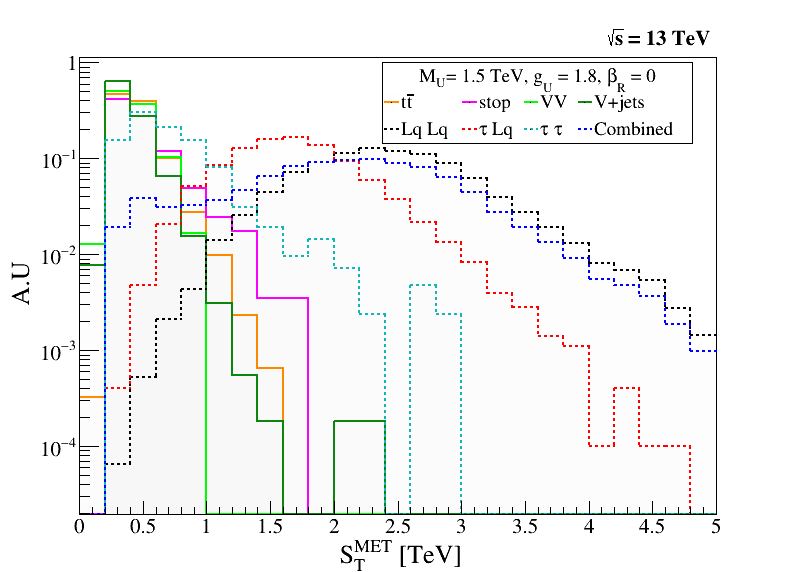

In [16]:
Histos, canvas, legend, Dict_Hist = Overlap_Histos(Signal_Histogram_Dict = Histograms_signal, 
                                                   Bkg_Histogram_Dict = Histograms_bkg, 
                                                   channel = "hadronic_dLQ",
                                                   Signal_Directory = {'Lq Lq': ['LQ_LQ'], '#tau Lq': ['Tau_LQ'], '#tau #tau': ['Tau_Tau'], 'Combined':  ['LQ_LQ', 'Tau_LQ', 'Tau_Tau']}, 
                                                   Bkg_Directory = {'t#bar{t}': ['ttbar'], 'stop': ['stop'], 'VV': ['ww', 'wz', 'zz'], 'V+jets': ['w_jets', 'z_jets']}, 
                                                   Title_Plot = '',
                                                   Kinematic_variable = 'sT(GeV)',
                                                   Mass = '1500', 
                                                   betard_key = 'woRHC',
                                                   Signal_to_ignore = '', 
                                                   alpha_bkg = 0.0, 
                                                   alpha_signal = 0.00, 
                                                   Stack = False, 
                                                   Log_Y = True, 
                                                   Log_X = False, 
                                                   Grid = False,
                                                   Path_folder_to_save = '')

Histos.SetTitle('; S_{T}^{MET} [TeV]; A.U') 
Histos.GetXaxis().CenterTitle(True)
Histos.GetYaxis().CenterTitle(True)

Histos.GetXaxis().SetTitleSize(0.05)
Histos.GetYaxis().SetTitleSize(0.05)
Histos.GetXaxis().SetLabelSize(0.04)
Histos.GetYaxis().SetLabelSize(0.04)

Histos.GetXaxis().SetLabelOffset(0.0001)
Histos.GetYaxis().SetLabelOffset(0.0001)
Histos.GetXaxis().SetTitleOffset(0.9)
Histos.GetYaxis().SetTitleOffset(0.95)

Histos.GetXaxis().SetMaxDigits(2)
Histos.GetYaxis().SetMaxDigits(1)    

Warning in <TCanvas::Constructor>: Deleting canvas with same name: #tau_{h}#tau_{h}
Warning in <TCanvas::Constructor>: Deleting canvas with same name: b#tau_{h}#tau_{h}
Warning in <TCanvas::Constructor>: Deleting canvas with same name: bb#tau_{h}#tau_{h}
Warning in <TCanvas::Constructor>: Deleting canvas with same name: #tau_{h}#tau_{lep}
Warning in <TCanvas::Constructor>: Deleting canvas with same name: b#tau_{h}#tau_{lep}
Warning in <TCanvas::Constructor>: Deleting canvas with same name: bb#tau_{h}#tau_{lep}


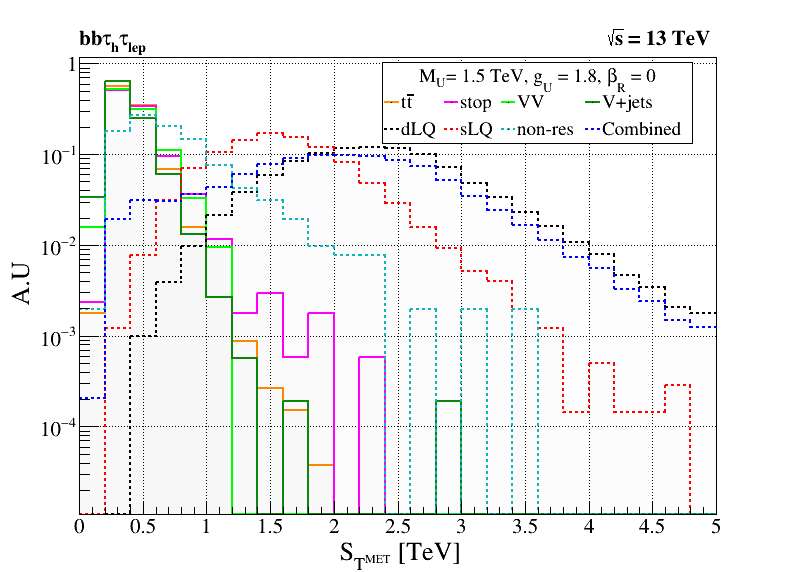

In [17]:
#try: os.mkdir('ST_Histograms')
#except: pass

for process in channels:
    
    if (process == 'hadronic_non-resonant'): titulo = '#tau_{h}#tau_{h}'
    if (process == 'hadronic_sLQ'): titulo = 'b#tau_{h}#tau_{h}'
    if (process == 'hadronic_dLQ'): titulo = 'bb#tau_{h}#tau_{h}'
    if (process == 'semileptonic_non-resonant'): titulo = '#tau_{h}#tau_{lep}'
    if (process == 'semileptonic_sLQ'): titulo = 'b#tau_{h}#tau_{lep}'
    if (process == 'semileptonic_dLQ'): titulo = 'bb#tau_{h}#tau_{lep}'   
                    
    Histos, canvas, legend, Dict_Hist = Overlap_Histos(Signal_Histogram_Dict = Histograms_signal, 
                                                   Bkg_Histogram_Dict = Histograms_bkg, 
                                                   channel = process,
                                                   Signal_Directory = {'dLQ': ['LQ_LQ'], 'sLQ': ['Tau_LQ'], 'non-res': ['Tau_Tau'], 'Combined':  ['LQ_LQ', 'Tau_LQ', 'Tau_Tau']}, 
                                                   Bkg_Directory = {'t#bar{t}': ['ttbar'], 'stop': ['stop'], 'VV': ['ww', 'wz', 'zz'], 'V+jets': ['w_jets', 'z_jets']}, 
                                                   Title_Plot = titulo,
                                                   Kinematic_variable = 'sT(GeV)',
                                                   Mass = '1500', 
                                                   betard_key = 'wRHC',
                                                   Signal_to_ignore = '', 
                                                   alpha_bkg = 0.0, 
                                                   alpha_signal = 0.00, 
                                                   Stack = False, 
                                                   Log_Y = True, 
                                                   Log_X = False, 
                                                   Grid = False,
                                                   Path_folder_to_save = '')
    Histos.SetTitle('; S_{T^{MET}} [TeV]; A.U') 
    Histos.GetXaxis().CenterTitle(True)
    Histos.GetYaxis().CenterTitle(True)
    
    Histos.GetXaxis().SetTitleSize(0.05)
    Histos.GetYaxis().SetTitleSize(0.05)
    Histos.GetXaxis().SetLabelSize(0.04)
    Histos.GetYaxis().SetLabelSize(0.04)
    
    Histos.GetXaxis().SetLabelOffset(0.0001)
    Histos.GetYaxis().SetLabelOffset(0.0001)
    Histos.GetXaxis().SetTitleOffset(0.9)
    Histos.GetYaxis().SetTitleOffset(0.95)
    
    Histos.GetXaxis().SetMaxDigits(2)
    Histos.GetYaxis().SetMaxDigits(1)    
    canvas.SetGrid()
    #canvas.SaveAs(os.path.join('ST_Histograms', f'sT(GeV)_{process}_wRHC.pdf')) 
    
    Histos, canvas, legend, Dict_Hist = Overlap_Histos(Signal_Histogram_Dict = Histograms_signal, 
                                                   Bkg_Histogram_Dict = Histograms_bkg, 
                                                   channel = process,
                                                   Signal_Directory = {'dLQ': ['LQ_LQ'], 'sLQ': ['Tau_LQ'], 'non-res': ['Tau_Tau'], 'Combined':  ['LQ_LQ', 'Tau_LQ', 'Tau_Tau']}, 
                                                   Bkg_Directory = {'t#bar{t}': ['ttbar'], 'stop': ['stop'], 'VV': ['ww', 'wz', 'zz'], 'V+jets': ['w_jets', 'z_jets']}, 
                                                   Title_Plot = titulo,
                                                   Kinematic_variable = 'sT(GeV)',
                                                   Mass = '1500', 
                                                   betard_key = 'woRHC',
                                                   Signal_to_ignore = '', 
                                                   alpha_bkg = 0.0, 
                                                   alpha_signal = 0.00, 
                                                   Stack = False, 
                                                   Log_Y = True, 
                                                   Log_X = False, 
                                                   Grid = False,
                                                   Path_folder_to_save = '')

    Histos.SetTitle('; S_{T^{MET}} [TeV]; A.U') 
    Histos.GetXaxis().CenterTitle(True)
    Histos.GetYaxis().CenterTitle(True)
    
    Histos.GetXaxis().SetTitleSize(0.05)
    Histos.GetYaxis().SetTitleSize(0.05)
    Histos.GetXaxis().SetLabelSize(0.04)
    Histos.GetYaxis().SetLabelSize(0.04)
    
    Histos.GetXaxis().SetLabelOffset(0.0001)
    Histos.GetYaxis().SetLabelOffset(0.0001)
    Histos.GetXaxis().SetTitleOffset(0.9)
    Histos.GetYaxis().SetTitleOffset(0.95)
    
    Histos.GetXaxis().SetMaxDigits(2)
    Histos.GetYaxis().SetMaxDigits(1)    
    canvas.SetGrid()
    #canvas.SaveAs(os.path.join('ST_Histograms', f'sT(GeV)_{process}_woRHC.pdf')) 

Final Options:

In [18]:
# process = 'semileptonic_sLQ'
# titulo = 'b#tau_{h}#tau_{lep}'
                
# Histos, canvas, legend, Dict_Hist = Overlap_Histos(Signal_Histogram_Dict = Histograms_signal, 
#                                                Bkg_Histogram_Dict = Histograms_bkg, 
#                                                channel = process,
#                                                Signal_Directory = {'dLQ': ['LQ_LQ'], 'sLQ': ['Tau_LQ'], 'non-res': ['Tau_Tau'], 'Combined':  ['LQ_LQ', 'Tau_LQ', 'Tau_Tau']}, 
#                                                Bkg_Directory = {'t#bar{t}': ['ttbar'], 'stop': ['stop'], 'VV': ['ww', 'wz', 'zz'], 'V+jets': ['w_jets', 'z_jets']}, 
#                                                Title_Plot = titulo,
#                                                Kinematic_variable = 'sT(GeV)',
#                                                Mass = '1500', 
#                                                betard_key = 'wRHC',
#                                                Signal_to_ignore = '', 
#                                                alpha_bkg = 0.0, 
#                                                alpha_signal = 0.00, 
#                                                Stack = False, 
#                                                Log_Y = True, 
#                                                Log_X = False, 
#                                                Grid = False,
#                                                Path_folder_to_save = '')

# Histos.SetTitle('; S_{T^{MET}} [TeV]; A.U') 
# Histos.GetXaxis().CenterTitle(True)
# Histos.GetYaxis().CenterTitle(True)

# Histos.GetXaxis().SetTitleSize(0.05)
# Histos.GetYaxis().SetTitleSize(0.05)
# Histos.GetXaxis().SetLabelSize(0.04)
# Histos.GetYaxis().SetLabelSize(0.04)

# Histos.GetXaxis().SetLabelOffset(0.0001)
# Histos.GetYaxis().SetLabelOffset(0.0001)
# Histos.GetXaxis().SetTitleOffset(0.9)
# Histos.GetYaxis().SetTitleOffset(0.95)

# Histos.GetXaxis().SetMaxDigits(2)
# Histos.GetYaxis().SetMaxDigits(1)    
# canvas.SetGrid()
# canvas.SaveAs(os.path.join('ST_Histograms', f'sT(GeV)_{process}_wRHC.pdf')) 

In [19]:
# suffix_by_betard = {'wRHC': '', 'woRHC': '_wo_RHC'}
# header_by_betard = {'wRHC': '#beta_{R} = -1', 'woRHC': '#beta_{R} = 0'}

# def Overlap_Histos(Signal_Histogram_Dict, 
#                    Bkg_Histogram_Dict, 
#                    channel,
#                    Signal_Directory, 
#                    Bkg_Directory, 
#                    Title_Plot,
#                    Kinematic_variable,
#                    Mass, 
#                    betard_key = 'wRHC',
#                    Signal_to_ignore = '', 
#                    alpha_bkg = 0.05, 
#                    alpha_signal = 0.05, 
#                    Stack = False, 
#                    Log_Y = False, 
#                    Log_X = True, 
#                    Grid = False,
#                    Path_folder_to_save = ''):
    
#     #if Stack is False -> Histograms will be normalized by A.U
#     #if Stack is True -> Histograms will be normalized by number of physical events
    
#     #canvas = TCanvas(Title_Plot, " ", 0, 0, 1280, 720)
#     canvas = TCanvas(Title_Plot, " ", 0, 0, 800, 600)
    
    
#     #legend = TLegend(0.9,.4,1,.89) #Legend outside the graph
#     legend = TLegend(0.48,.75,0.87,.89)
#     legend.SetTextFont(132)
#     legend.SetNColumns(4) 
#     legend.SetHeader('M_{U}' + f'= {int(Mass)/1000} TeV' + ', g_{U} = 1.8' + ', ' + header_by_betard[betard_key],"C")
                       
#     legend.SetLineWidth(1)
#     #legend.SetFillStyle(0) #Transparent legend window
    
#     x_axis = Kinematic_variable.replace('(GeV)', '[GeV]')
    
#     Histos = THStack('hist', Title_Plot)
#     colors = [94,6,3,209,4,2,226,1] #https://root-forum.cern.ch/t/what-is-your-best-way-to-increment-colors/13809
    
#     Dict_Hist = {}
        
#     for i in range(len(Bkg_Directory.keys())):
#             bkg_key = list(Bkg_Directory.keys())[i]
#             bkg_list = Bkg_Directory[bkg_key]
            
#             histo_list = []
#             for bkg in bkg_list:
#                 if (bkg != Signal_to_ignore):
#                     if (Bkg_Histogram_Dict[channel][bkg][Kinematic_variable] != {}):
#                         h = Bkg_Histogram_Dict[channel][bkg][Kinematic_variable]
#                         h.Scale(Read_Cutflows_N_Events(channel, bkg)/h.Integral())
#                         histo_list.append(h)
                
#             histo_Nevents = root_analysis.sum_histos(histo_list)
#             histo_normalized = root_analysis.sum_histos(histo_list)
#             histo_normalized.Scale(1.0/histo_normalized.Integral())
            
#             if (Stack): 
#                 histo = histo_Nevents
#                 histo.SetTitle(f'{bkg_key}; {x_axis}; Events')
#             else: 
#                 histo = histo_normalized
#                 histo.SetTitle(f'{bkg_key}; {x_axis}; A.U')
            
#             color = len(Signal_Directory.keys()) + i + 1
#             if color == 7: color = 3
            
#             color = colors[i]
            
#             histo.SetLineColor(color)
#             histo.SetFillColorAlpha(color, alpha_bkg)
#             histo.SetLineWidth(2)
#             histo.SetDirectory(0)  
#             histo.Rebin(2)
            
#             Histos.Add(histo)
#             Dict_Hist[bkg_key] = histo
#             legend.AddEntry(histo,bkg_key)
    
#     Signal_Histogram_Dict = Signal_Histogram_Dict[betard_key]
#     for j in range(len(Signal_Directory.keys())):
#             signal_key = list(Signal_Directory.keys())[j]
#             signal_list = Signal_Directory[signal_key]
            
#             histo_list = []
#             for signal in signal_list:
#                 if (signal != Signal_to_ignore):
#                     if (Signal_Histogram_Dict[channel][Mass][signal][Kinematic_variable] != {}):
#                         h = Signal_Histogram_Dict[channel][Mass][signal][Kinematic_variable]
#                         h.Scale(Read_Cutflows_N_Events(channel, f'{signal}{suffix_by_betard[betard_key]}_{Mass}')/h.Integral())
#                         histo_list.append(h)
                
#             histo_Nevents = root_analysis.sum_histos(histo_list)
            
#             histo_normalized = root_analysis.sum_histos(histo_list)
#             histo_normalized.Scale(1.0/histo_normalized.Integral())
        
#             if (Stack): 
#                 histo = histo_Nevents
#                 histo.SetTitle(f'{signal_key}; {x_axis}; Events')
#             else: 
#                 histo = histo_normalized

#                 if signal_key == 'sLQ':
#                     weight = 58.7/378.5
#                     histo.Scale(weight/histo.Integral())
#                 if signal_key == 'dLQ':
#                     weight = 34.3/378.5
#                     histo.Scale(weight/histo.Integral())
#                 if signal_key == 'non-res':
#                     weight = 285.5/378.5
#                     histo.Scale(weight/histo.Integral())
                
#                 histo.SetTitle(f'{signal_key}; {x_axis}; A.U')
            
#             color = j + 1
#             if color == 3: color = 7
            
#             color = colors[i + j + 1]
            
#             histo.SetLineColor(color)
#             histo.SetFillColorAlpha(color, alpha_signal)
#             histo.SetLineStyle(2)
#             histo.SetLineWidth(2)
#             histo.SetDirectory(0) 
#             histo.Rebin(2)
            
#             Histos.Add(histo)
#             Dict_Hist[signal_key] = histo
#             legend.AddEntry(histo,signal_key)
            
#     if Log_Y: canvas.SetLogy()
#     if Log_X: canvas.SetLogx()
#     if Grid: canvas.SetGrid()   
                       
#     if Stack:
#         Histos.Draw("hist")
#         Histos.SetTitle(f'; {x_axis}; Events')  
        
#     else: 
#         Histos.Draw("histnostack")
#         Histos.SetTitle(f'; {x_axis}; A.U')  
    
#     latex = TLatex()
#     latex.SetNDC()
#     latex.SetTextSize(0.04)
#     latex.SetTextFont(22) #https://root.cern.ch/doc/master/classTAttText.html
#     latex.DrawLatex(0.76,0.92,'#sqrt{s} = 13 TeV')
#     latex.DrawLatex(0.1,0.92,Title_Plot)

#     Histos.GetXaxis().SetTitleFont(132)
#     Histos.GetXaxis().SetLabelFont(132)
#     Histos.GetYaxis().SetTitleFont(132)
#     Histos.GetYaxis().SetLabelFont(132)                       
                       
#     #latex.DrawLatex(0.61,0.91,'#sqrt{s} = 13 TeV, L = 137 fb^{-1}')
#     canvas.Draw()
#     legend.Draw('same')
    
#     #Histos.GetXaxis().SetLimits(0.0, float(Mass)*3)          
    
#     if Path_folder_to_save != '':
#         try: os.mkdir(Path_folder_to_save)
#         except: pass

#         with root_analysis.Quiet():
#             root_analysis.Save_Histograms_png(Path_folder_to_save, Dict_Hist, Log_Y = True)
#             root_analysis.Write_txt_file_with_high_per_bin(os.path.join(Path_folder_to_save, 'high_per_bin'), Dict_Hist)
#             canvas.SaveAs(os.path.join(Path_folder_to_save, f'THStack_{channel}.png')) 
            
#     Dict_Hist['THStack'] = Histos     
    
#     return Histos, canvas, legend, Dict_Hist

In [20]:
# process = 'semileptonic_sLQ'
# titulo = 'b#tau_{h}#tau_{lep}'
                
# Histos, canvas, legend, Dict_Hist = Overlap_Histos(Signal_Histogram_Dict = Histograms_signal, 
#                                                Bkg_Histogram_Dict = Histograms_bkg, 
#                                                channel = process,
#                                                Signal_Directory = {'dLQ': ['LQ_LQ'], 'sLQ': ['Tau_LQ'], 'non-res': ['Tau_Tau'], 'Combined':  ['LQ_LQ', 'Tau_LQ', 'Tau_Tau']}, 
#                                                Bkg_Directory = {'t#bar{t}': ['ttbar'], 'stop': ['stop'], 'VV': ['ww', 'wz', 'zz'], 'V+jets': ['w_jets', 'z_jets']}, 
#                                                Title_Plot = titulo,
#                                                Kinematic_variable = 'sT(GeV)',
#                                                Mass = '1500', 
#                                                betard_key = 'wRHC',
#                                                Signal_to_ignore = '', 
#                                                alpha_bkg = 0.0, 
#                                                alpha_signal = 0.00, 
#                                                Stack = False, 
#                                                Log_Y = True, 
#                                                Log_X = False, 
#                                                Grid = False,
#                                                Path_folder_to_save = '')

# Histos.SetTitle('; S_{T^{MET}} [TeV]; A.U') 
# Histos.GetXaxis().CenterTitle(True)
# Histos.GetYaxis().CenterTitle(True)

# Histos.GetXaxis().SetTitleSize(0.05)
# Histos.GetYaxis().SetTitleSize(0.05)
# Histos.GetXaxis().SetLabelSize(0.04)
# Histos.GetYaxis().SetLabelSize(0.04)

# Histos.GetXaxis().SetLabelOffset(0.0001)
# Histos.GetYaxis().SetLabelOffset(0.0001)
# Histos.GetXaxis().SetTitleOffset(0.9)
# Histos.GetYaxis().SetTitleOffset(0.95)

# Histos.GetXaxis().SetMaxDigits(2)
# Histos.GetYaxis().SetMaxDigits(1)    
# canvas.SetGrid()
# canvas.SaveAs(os.path.join('ST_Histograms', f'sT(GeV)_{process}_wRHC.pdf')) 

In [21]:
suffix_by_betard = {'wRHC': '', 'woRHC': '_wo_RHC'}
header_by_betard = {'wRHC': '#beta_{R} = -1', 'woRHC': '#beta_{R} = 0'}

def Overlap_Histos(Signal_Histogram_Dict, 
                   Bkg_Histogram_Dict, 
                   channel,
                   Signal_Directory, 
                   Bkg_Directory, 
                   Title_Plot,
                   Kinematic_variable,
                   Mass, 
                   betard_key = 'wRHC',
                   Signal_to_ignore = '', 
                   alpha_bkg = 0.05, 
                   alpha_signal = 0.05, 
                   Stack = False, 
                   Log_Y = False, 
                   Log_X = True, 
                   Grid = False,
                   Path_folder_to_save = ''):
    
    #if Stack is False -> Histograms will be normalized by A.U
    #if Stack is True -> Histograms will be normalized by number of physical events


    #canvas = TCanvas(Title_Plot, " ", 0, 0, 1280, 720)
    canvas = TCanvas(Title_Plot, " ", 0, 0, 600, 600)
                    
    #legend = TLegend(0.9,.4,1,.89) #Legend outside the graph
    legend = TLegend(0.38,.76,0.89,.89)
    legend.SetTextFont(132)
    legend.SetNColumns(4) 
    # legend.SetHeader(,"C")
                       
    legend.SetLineWidth(1)
    #legend.SetFillStyle(0) #Transparent legend window
    
    x_axis = Kinematic_variable.replace('(GeV)', '[GeV]')
    
    Histos1 = THStack('hist', Title_Plot)
    Histos2 = THStack('hist', Title_Plot)
    Histos3 = THStack('hist', Title_Plot)
                       
    colors = [94,51,99,209,4,2,432,1] #https://root-forum.cern.ch/t/what-is-your-best-way-to-increment-colors/13809
    
    Dict_Hist = {}
        
    for i in range(len(Bkg_Directory.keys())):
            bkg_key = list(Bkg_Directory.keys())[i]
            bkg_list = Bkg_Directory[bkg_key]
            
            histo_list = []
            for bkg in bkg_list:
                if (bkg != Signal_to_ignore):
                    if (Bkg_Histogram_Dict[channel][bkg][Kinematic_variable] != {}):
                        h = Bkg_Histogram_Dict[channel][bkg][Kinematic_variable]
                        h.Scale(Read_Cutflows_N_Events(channel, bkg)/h.Integral())
                        histo_list.append(h)
                
            histo_Nevents = root_analysis.sum_histos(histo_list)
            histo_normalized = root_analysis.sum_histos(histo_list)
            histo_normalized.Scale(1.0/histo_normalized.Integral())
            
            if (Stack): 
                histo = histo_Nevents
                histo.SetTitle(f'{bkg_key}; {x_axis}; Events')
            else: 
                histo = histo_normalized
                histo.SetTitle(f'{bkg_key}; {x_axis}; A.U')
            
            color = len(Signal_Directory.keys()) + i + 1
            if color == 7: color = 3
            
            color = colors[i]
            
            histo.SetLineColor(color)
            histo.SetFillColorAlpha(color, alpha_bkg)
            histo.SetLineWidth(2)
            histo.SetDirectory(0)  
            histo.Rebin(2)
            histo.GetYaxis().SetRangeUser(0.0001,1)
            
            Histos1.Add(histo)
            Dict_Hist[bkg_key] = histo
            legend.AddEntry(histo,bkg_key)
    
    Signal_Histogram_Dict = Signal_Histogram_Dict[betard_key]
    for j in range(len(Signal_Directory.keys())):
            signal_key = list(Signal_Directory.keys())[j]
            signal_list = Signal_Directory[signal_key]
            
            histo_list = []
            for signal in signal_list:
                if (signal != Signal_to_ignore):
                    if (Signal_Histogram_Dict[channel][Mass][signal][Kinematic_variable] != {}):
                        h = Signal_Histogram_Dict[channel][Mass][signal][Kinematic_variable]
                        h.Scale(Read_Cutflows_N_Events(channel, f'{signal}{suffix_by_betard[betard_key]}_{Mass}')/h.Integral())
                        histo_list.append(h)
                
            histo_Nevents = root_analysis.sum_histos(histo_list)
            
            histo_normalized = root_analysis.sum_histos(histo_list)
            histo_normalized.Scale(1.0/histo_normalized.Integral())
        
            if (Stack): 
                histo = histo_Nevents
                histo.SetTitle(f'{signal_key}; {x_axis}; Events')
            else: 
                histo = histo_normalized

                if signal_key == 'sLQ':
                    weight = 58.7/378.5
                    histo.Scale(weight/histo.Integral())
                if signal_key == 'dLQ':
                    weight = 34.3/378.5
                    histo.Scale(weight/histo.Integral())
                if signal_key == 'non-res':
                    weight = 285.5/378.5
                    histo.Scale(weight/histo.Integral())
                
                histo.SetTitle(f'{signal_key}; {x_axis}; A.U')
            
            color = j + 1
            if color == 3: color = 7
            
            color = colors[i + j + 1]
            
            histo.SetLineColor(color)
            histo.SetFillColorAlpha(color, alpha_signal)
            histo.SetLineStyle(0)
            histo.SetLineWidth(0)
            histo.SetDirectory(0) 
            histo.Rebin(2)
            histo.GetYaxis().SetRangeUser(0.0001,1)

            if signal_key != 'Combined': 
                Histos2.Add(histo)
                histo.SetMarkerSize()
                legend.AddEntry(histo,signal_key)
            else:  
                histo.SetLineStyle(2) 
                histo.SetLineWidth(2)
                histo.SetFillColorAlpha(color, 0.0)   
                
                # histo.SetMarkerStyle(21)
                # histo.SetMarkerSize(2)
                Histos3.Add(histo)
                legend.AddEntry(histo,signal_key)
                
            Dict_Hist[signal_key] = histo
            
    if Log_Y: canvas.SetLogy()
    if Log_X: canvas.SetLogx()
    if Grid: canvas.SetGrid()   
                       
    if Stack:
        Histos1.Draw("hist")
        Histos1.SetTitle(f'; {x_axis}; Events')  
        
    else: 

        # Histos2.Draw("hist")
        # Histos3.Draw("*Hsame")
        # Histos1.Draw("histnostacksame")
        
        # Histos1.Draw("histnostack")
        # Histos2.Draw("histsame")
        # Histos3.Draw("*Hsame")
        
        Histos3.Draw("histnostack")        
        Histos2.Draw("histsame")
        Histos1.Draw("histnostacksame")
        Histos1.SetTitle(f'; {x_axis}; A.U')  
        Histos2.SetTitle(f'; {x_axis}; A.U')  
        Histos3.SetTitle(f'; {x_axis}; A.U')  
    
    latex = TLatex()
    latex.SetNDC()
    latex.SetTextSize(0.04)
    latex.SetTextFont(22) #https://root.cern.ch/doc/master/classTAttText.html
    latex.DrawLatex(0.24,0.92,'M_{U}' + f'= {int(Mass)/1000} TeV' + ', g_{U} = 1.8' + ', ' + header_by_betard[betard_key] + ', #sqrt{s} = 13 TeV')
    latex.DrawLatex(0.1,0.92,Title_Plot)

    Histos1.GetXaxis().SetTitleFont(132)
    Histos1.GetXaxis().SetLabelFont(132)
    Histos1.GetYaxis().SetTitleFont(132)
    Histos1.GetYaxis().SetLabelFont(132)           
    Histos2.GetXaxis().SetTitleFont(132)
    Histos2.GetXaxis().SetLabelFont(132)
    Histos2.GetYaxis().SetTitleFont(132)
    Histos2.GetYaxis().SetLabelFont(132)   
    Histos3.GetXaxis().SetTitleFont(132)
    Histos3.GetXaxis().SetLabelFont(132)
    Histos3.GetYaxis().SetTitleFont(132)
    Histos3.GetYaxis().SetLabelFont(132)   

    #latex.DrawLatex(0.61,0.91,'#sqrt{s} = 13 TeV, L = 137 fb^{-1}')
    canvas.Draw()
    legend.Draw('same')
    
    #Histos.GetXaxis().SetLimits(0.0, float(Mass)*3)          
    
    if Path_folder_to_save != '':
        try: os.mkdir(Path_folder_to_save)
        except: pass

        with root_analysis.Quiet():
            root_analysis.Save_Histograms_png(Path_folder_to_save, Dict_Hist, Log_Y = True)
            root_analysis.Write_txt_file_with_high_per_bin(os.path.join(Path_folder_to_save, 'high_per_bin'), Dict_Hist)
            canvas.SaveAs(os.path.join(Path_folder_to_save, f'THStack_{channel}.png')) 
            
    Dict_Hist['THStack'] = Histos     
    
    return Histos1, Histos2, Histos3, canvas, legend, Dict_Hist

Info in <TCanvas::Print>: pdf file sT(TeV)_semileptonic_sLQ_wRHC.pdf has been created


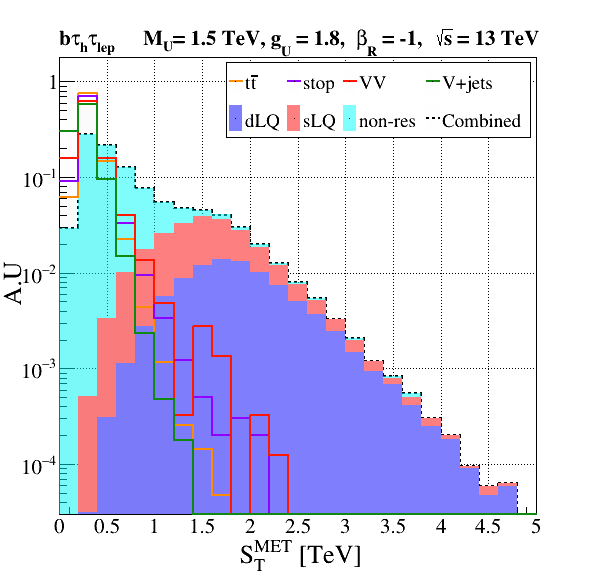

In [22]:
process = 'semileptonic_sLQ'
titulo = 'b#tau_{h}#tau_{lep}'
                
Histos1, Histos2, Histos3, canvas, legend, Dict_Hist = Overlap_Histos(Signal_Histogram_Dict = Histograms_signal, 
                                               Bkg_Histogram_Dict = Histograms_bkg, 
                                               channel = process,
                                               Signal_Directory = {'dLQ': ['LQ_LQ'], 'sLQ': ['Tau_LQ'], 'non-res': ['Tau_Tau'], 'Combined':  ['LQ_LQ', 'Tau_LQ', 'Tau_Tau']}, 
                                               Bkg_Directory = {'t#bar{t}': ['ttbar'], 'stop': ['stop'], 'VV': ['ww', 'wz', 'zz'], 'V+jets': ['w_jets', 'z_jets']}, 
                                               Title_Plot = titulo,
                                               Kinematic_variable = 'sT(GeV)',
                                               Mass = '1500', 
                                               betard_key = 'wRHC',
                                               Signal_to_ignore = '', 
                                               alpha_bkg = 0.00, 
                                               alpha_signal = 0.5, 
                                               Stack = False, 
                                               Log_Y = True, 
                                               Log_X = False, 
                                               Grid = False,
                                               Path_folder_to_save = '')

Histos1.SetTitle('; S_{T}^{MET} [TeV]; A.U') 
Histos1.GetXaxis().CenterTitle(True)
Histos1.GetYaxis().CenterTitle(True)

Histos1.GetXaxis().SetTitleSize(0.05)
Histos1.GetYaxis().SetTitleSize(0.05)
Histos1.GetXaxis().SetLabelSize(0.04)
Histos1.GetYaxis().SetLabelSize(0.04)

Histos1.GetXaxis().SetLabelOffset(0.0001)
Histos1.GetYaxis().SetLabelOffset(0.0001)
Histos1.GetXaxis().SetTitleOffset(0.9)
Histos1.GetYaxis().SetTitleOffset(1)

Histos1.GetXaxis().SetMaxDigits(2)
Histos1.GetYaxis().SetMaxDigits(1)  

Histos2.SetTitle('; S_{T}^{MET} [TeV]; A.U') 
Histos2.GetXaxis().CenterTitle(True)
Histos2.GetYaxis().CenterTitle(True)

Histos2.GetXaxis().SetTitleSize(0.05)
Histos2.GetYaxis().SetTitleSize(0.05)
Histos2.GetXaxis().SetLabelSize(0.04)
Histos2.GetYaxis().SetLabelSize(0.04)

Histos2.GetXaxis().SetLabelOffset(0.0001)
Histos2.GetYaxis().SetLabelOffset(0.0001)
Histos2.GetXaxis().SetTitleOffset(0.9)
Histos2.GetYaxis().SetTitleOffset(1)

Histos2.GetXaxis().SetMaxDigits(2)
Histos2.GetYaxis().SetMaxDigits(1)  

Histos3.SetTitle('; S_{T}^{MET} [TeV]; A.U') 
Histos3.GetXaxis().CenterTitle(True)
Histos3.GetYaxis().CenterTitle(True)

Histos3.GetXaxis().SetTitleSize(0.05)
Histos3.GetYaxis().SetTitleSize(0.05)
Histos3.GetXaxis().SetLabelSize(0.04)
Histos3.GetYaxis().SetLabelSize(0.04)

Histos3.GetXaxis().SetLabelOffset(0.0001)
Histos3.GetYaxis().SetLabelOffset(0.0001)
Histos3.GetXaxis().SetTitleOffset(0.9)
Histos3.GetYaxis().SetTitleOffset(1)

Histos3.GetXaxis().SetMaxDigits(2)
Histos3.GetYaxis().SetMaxDigits(1)  

canvas.SetGrid()
canvas.Update()
canvas.SaveAs(os.path.join(f'sT(TeV)_{process}_wRHC.pdf')) 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: b#tau_{h}#tau_{lep}
Info in <TCanvas::Print>: pdf file m(TeV)_semileptonic_sLQ_wRHC.pdf has been created


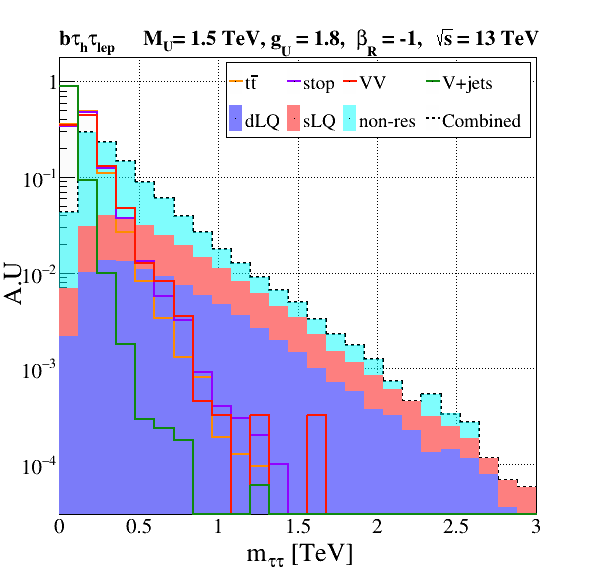

In [23]:
process = 'semileptonic_sLQ'
titulo = 'b#tau_{h}#tau_{lep}'
                
Histos1, Histos2, Histos3, canvas, legend, Dict_Hist = Overlap_Histos(Signal_Histogram_Dict = Histograms_signal, 
                                               Bkg_Histogram_Dict = Histograms_bkg, 
                                               channel = process,
                                               Signal_Directory = {'dLQ': ['LQ_LQ'], 'sLQ': ['Tau_LQ'], 'non-res': ['Tau_Tau'], 'Combined':  ['LQ_LQ', 'Tau_LQ', 'Tau_Tau']}, 
                                               Bkg_Directory = {'t#bar{t}': ['ttbar'], 'stop': ['stop'], 'VV': ['ww', 'wz', 'zz'], 'V+jets': ['w_jets', 'z_jets']}, 
                                               Title_Plot = titulo,
                                               Kinematic_variable = 'Mass_{lep_{1}#tau_{1}}(GeV)',
                                               Mass = '1500', 
                                               betard_key = 'wRHC',
                                               Signal_to_ignore = '', 
                                               alpha_bkg = 0.00, 
                                               alpha_signal = 0.5, 
                                               Stack = False, 
                                               Log_Y = True, 
                                               Log_X = False, 
                                               Grid = False,
                                               Path_folder_to_save = '')

Histos1.SetTitle('; m_{#tau#tau} [TeV]; A.U') 
Histos1.GetXaxis().CenterTitle(True)
Histos1.GetYaxis().CenterTitle(True)

Histos1.GetXaxis().SetTitleSize(0.05)
Histos1.GetYaxis().SetTitleSize(0.05)
Histos1.GetXaxis().SetLabelSize(0.04)
Histos1.GetYaxis().SetLabelSize(0.04)

Histos1.GetXaxis().SetLabelOffset(0.0001)
Histos1.GetYaxis().SetLabelOffset(0.0001)
Histos1.GetXaxis().SetTitleOffset(0.9)
Histos1.GetYaxis().SetTitleOffset(1)

Histos1.GetXaxis().SetMaxDigits(2)
Histos1.GetYaxis().SetMaxDigits(1)  

Histos2.SetTitle('; m_{#tau#tau} [TeV]; A.U') 
Histos2.GetXaxis().CenterTitle(True)
Histos2.GetYaxis().CenterTitle(True)

Histos2.GetXaxis().SetTitleSize(0.05)
Histos2.GetYaxis().SetTitleSize(0.05)
Histos2.GetXaxis().SetLabelSize(0.04)
Histos2.GetYaxis().SetLabelSize(0.04)

Histos2.GetXaxis().SetLabelOffset(0.0001)
Histos2.GetYaxis().SetLabelOffset(0.0001)
Histos2.GetXaxis().SetTitleOffset(0.9)
Histos2.GetYaxis().SetTitleOffset(1)

Histos2.GetXaxis().SetMaxDigits(2)
Histos2.GetYaxis().SetMaxDigits(1)  

Histos3.SetTitle('; m_{#tau#tau} [TeV]; A.U') 
Histos3.GetXaxis().CenterTitle(True)
Histos3.GetYaxis().CenterTitle(True)

Histos3.GetXaxis().SetTitleSize(0.05)
Histos3.GetYaxis().SetTitleSize(0.05)
Histos3.GetXaxis().SetLabelSize(0.04)
Histos3.GetYaxis().SetLabelSize(0.04)

Histos3.GetXaxis().SetLabelOffset(0.0001)
Histos3.GetYaxis().SetLabelOffset(0.0001)
Histos3.GetXaxis().SetTitleOffset(0.9)
Histos3.GetYaxis().SetTitleOffset(1)

Histos3.GetXaxis().SetMaxDigits(2)
Histos3.GetYaxis().SetMaxDigits(1)  

canvas.SetGrid()
canvas.Update()
canvas.SaveAs(os.path.join(f'm(TeV)_{process}_wRHC.pdf')) 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: b#tau_{h}#tau_{lep}
Info in <TCanvas::Print>: pdf file DeltaR_semileptonic_sLQ_wRHC.pdf has been created


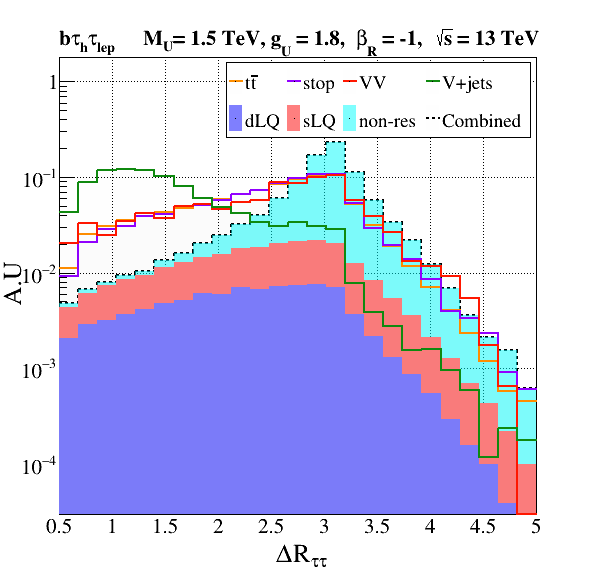

In [27]:
process = 'semileptonic_sLQ'
titulo = 'b#tau_{h}#tau_{lep}'
                
Histos1, Histos2, Histos3, canvas, legend, Dict_Hist = Overlap_Histos(Signal_Histogram_Dict = Histograms_signal, 
                                               Bkg_Histogram_Dict = Histograms_bkg, 
                                               channel = process,
                                               Signal_Directory = {'dLQ': ['LQ_LQ'], 'sLQ': ['Tau_LQ'], 'non-res': ['Tau_Tau'], 'Combined':  ['LQ_LQ', 'Tau_LQ', 'Tau_Tau']}, 
                                               Bkg_Directory = {'t#bar{t}': ['ttbar'], 'stop': ['stop'], 'VV': ['ww', 'wz', 'zz'], 'V+jets': ['w_jets', 'z_jets']}, 
                                               Title_Plot = titulo,
                                               Kinematic_variable = '#Delta R_{lep_{1}#tau_{1}}',
                                               Mass = '1500', 
                                               betard_key = 'wRHC',
                                               Signal_to_ignore = '', 
                                               alpha_bkg = 0.00, 
                                               alpha_signal = 0.5, 
                                               Stack = False, 
                                               Log_Y = True, 
                                               Log_X = False, 
                                               Grid = False,
                                               Path_folder_to_save = '')

Histos1.SetTitle('; #DeltaR_{#tau#tau}; A.U') 
Histos1.GetXaxis().CenterTitle(True)
Histos1.GetYaxis().CenterTitle(True)

Histos1.GetXaxis().SetTitleSize(0.05)
Histos1.GetYaxis().SetTitleSize(0.05)
Histos1.GetXaxis().SetLabelSize(0.04)
Histos1.GetYaxis().SetLabelSize(0.04)

Histos1.GetXaxis().SetLabelOffset(0.0001)
Histos1.GetYaxis().SetLabelOffset(0.0001)
Histos1.GetXaxis().SetTitleOffset(0.9)
Histos1.GetYaxis().SetTitleOffset(1)

Histos1.GetXaxis().SetMaxDigits(2)
Histos1.GetYaxis().SetMaxDigits(1)  

Histos2.SetTitle('; #DeltaR_{#tau#tau}; A.U')
Histos2.GetXaxis().CenterTitle(True)
Histos2.GetYaxis().CenterTitle(True)

Histos2.GetXaxis().SetTitleSize(0.05)
Histos2.GetYaxis().SetTitleSize(0.05)
Histos2.GetXaxis().SetLabelSize(0.04)
Histos2.GetYaxis().SetLabelSize(0.04)

Histos2.GetXaxis().SetLabelOffset(0.0001)
Histos2.GetYaxis().SetLabelOffset(0.0001)
Histos2.GetXaxis().SetTitleOffset(0.9)
Histos2.GetYaxis().SetTitleOffset(1)

Histos2.GetXaxis().SetMaxDigits(2)
Histos2.GetYaxis().SetMaxDigits(1)  

Histos3.SetTitle('; #DeltaR_{#tau#tau}; A.U') 
Histos3.GetXaxis().CenterTitle(True)
Histos3.GetYaxis().CenterTitle(True)

Histos3.GetXaxis().SetTitleSize(0.05)
Histos3.GetYaxis().SetTitleSize(0.05)
Histos3.GetXaxis().SetLabelSize(0.04)
Histos3.GetYaxis().SetLabelSize(0.04)

Histos3.GetXaxis().SetLabelOffset(0.0001)
Histos3.GetYaxis().SetLabelOffset(0.0001)
Histos3.GetXaxis().SetTitleOffset(0.9)
Histos3.GetYaxis().SetTitleOffset(1)

Histos3.GetXaxis().SetMaxDigits(2)
Histos3.GetYaxis().SetMaxDigits(1)  

canvas.SetGrid()
canvas.Update()
canvas.SaveAs(os.path.join(f'DeltaR_{process}_wRHC.pdf')) 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: b#tau_{h}#tau_{lep}
Info in <TCanvas::Print>: pdf file DeltaVecPT_semileptonic_sLQ_wRHC.pdf has been created


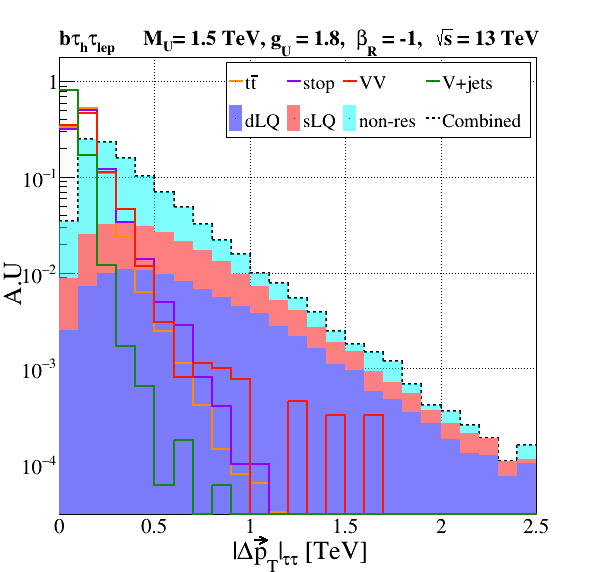

In [28]:
process = 'semileptonic_sLQ'
titulo = 'b#tau_{h}#tau_{lep}'
                
Histos1, Histos2, Histos3, canvas, legend, Dict_Hist = Overlap_Histos(Signal_Histogram_Dict = Histograms_signal, 
                                               Bkg_Histogram_Dict = Histograms_bkg, 
                                               channel = process,
                                               Signal_Directory = {'dLQ': ['LQ_LQ'], 'sLQ': ['Tau_LQ'], 'non-res': ['Tau_Tau'], 'Combined':  ['LQ_LQ', 'Tau_LQ', 'Tau_Tau']}, 
                                               Bkg_Directory = {'t#bar{t}': ['ttbar'], 'stop': ['stop'], 'VV': ['ww', 'wz', 'zz'], 'V+jets': ['w_jets', 'z_jets']}, 
                                               Title_Plot = titulo,
                                               Kinematic_variable = '#Delta #vec{pT}_{lep_{1}#tau_{1}}(GeV)',
                                               Mass = '1500', 
                                               betard_key = 'wRHC',
                                               Signal_to_ignore = '', 
                                               alpha_bkg = 0.00, 
                                               alpha_signal = 0.5, 
                                               Stack = False, 
                                               Log_Y = True, 
                                               Log_X = False, 
                                               Grid = False,
                                               Path_folder_to_save = '')

Histos1.SetTitle('; #Delta|#vec{p}_{T}|_{#tau#tau} [TeV]; A.U') 
Histos1.GetXaxis().CenterTitle(True)
Histos1.GetYaxis().CenterTitle(True)

Histos1.GetXaxis().SetTitleSize(0.05)
Histos1.GetYaxis().SetTitleSize(0.05)
Histos1.GetXaxis().SetLabelSize(0.04)
Histos1.GetYaxis().SetLabelSize(0.04)

Histos1.GetXaxis().SetLabelOffset(0.0001)
Histos1.GetYaxis().SetLabelOffset(0.0001)
Histos1.GetXaxis().SetTitleOffset(0.9)
Histos1.GetYaxis().SetTitleOffset(1)

Histos1.GetXaxis().SetMaxDigits(2)
Histos1.GetYaxis().SetMaxDigits(1)  

Histos2.SetTitle('; #Delta|#vec{p}_{T}|_{#tau#tau} [TeV]; A.U')
Histos2.GetXaxis().CenterTitle(True)
Histos2.GetYaxis().CenterTitle(True)

Histos2.GetXaxis().SetTitleSize(0.05)
Histos2.GetYaxis().SetTitleSize(0.05)
Histos2.GetXaxis().SetLabelSize(0.04)
Histos2.GetYaxis().SetLabelSize(0.04)

Histos2.GetXaxis().SetLabelOffset(0.0001)
Histos2.GetYaxis().SetLabelOffset(0.0001)
Histos2.GetXaxis().SetTitleOffset(0.9)
Histos2.GetYaxis().SetTitleOffset(1)

Histos2.GetXaxis().SetMaxDigits(2)
Histos2.GetYaxis().SetMaxDigits(1)  

Histos3.SetTitle('; |#Delta#vec{p}_{T}|_{#tau#tau} [TeV]; A.U')
Histos3.GetXaxis().CenterTitle(True)
Histos3.GetYaxis().CenterTitle(True)

Histos3.GetXaxis().SetTitleSize(0.05)
Histos3.GetYaxis().SetTitleSize(0.05)
Histos3.GetXaxis().SetLabelSize(0.04)
Histos3.GetYaxis().SetLabelSize(0.04)

Histos3.GetXaxis().SetLabelOffset(0.0001)
Histos3.GetYaxis().SetLabelOffset(0.0001)
Histos3.GetXaxis().SetTitleOffset(0.9)
Histos3.GetYaxis().SetTitleOffset(1)

Histos3.GetXaxis().SetMaxDigits(2)
Histos3.GetYaxis().SetMaxDigits(1)  

canvas.SetGrid()
canvas.Update()
canvas.SaveAs(os.path.join(f'DeltaVecPT_{process}_wRHC.pdf')) 

The axis can be fixed with adobe acrobat